# Create a 3D pedestrian

### Create the agent

In [1]:
from shapely.geometry import MultiPolygon

from configuration.models.agents import Agent
from configuration.models.measures import AgentMeasures
import configuration.utils.constants as cst

# Define the type of agent to be created (e.g., pedestrian)
agent_type = cst.AgentTypes.pedestrian

# Define a dictionary containing measurements specific to the agent type
measures = {
    "sex": "male",  # Specify the sex of the agent
    "bideltoid_breadth": 45.0,  # Shoulder breadth measurement in centimeters
    "chest_depth": 23.0,  # Chest depth measurement in centimeters
    "height": 180.0,  # Height of the agent in centimeters
    "weight": 75.0,  # Weight of the agent in kilograms
}

# Create an instance of AgentMeasures using the defined agent type and measurements
agent_measures = AgentMeasures(agent_type=agent_type, measures=measures)

# Create an instance of Agent using the defined agent type and measures object
current_agent = Agent(agent_type=agent_type, measures=agent_measures)

### Plot the 3D pedestrian

#### Plot the orthogonal projection

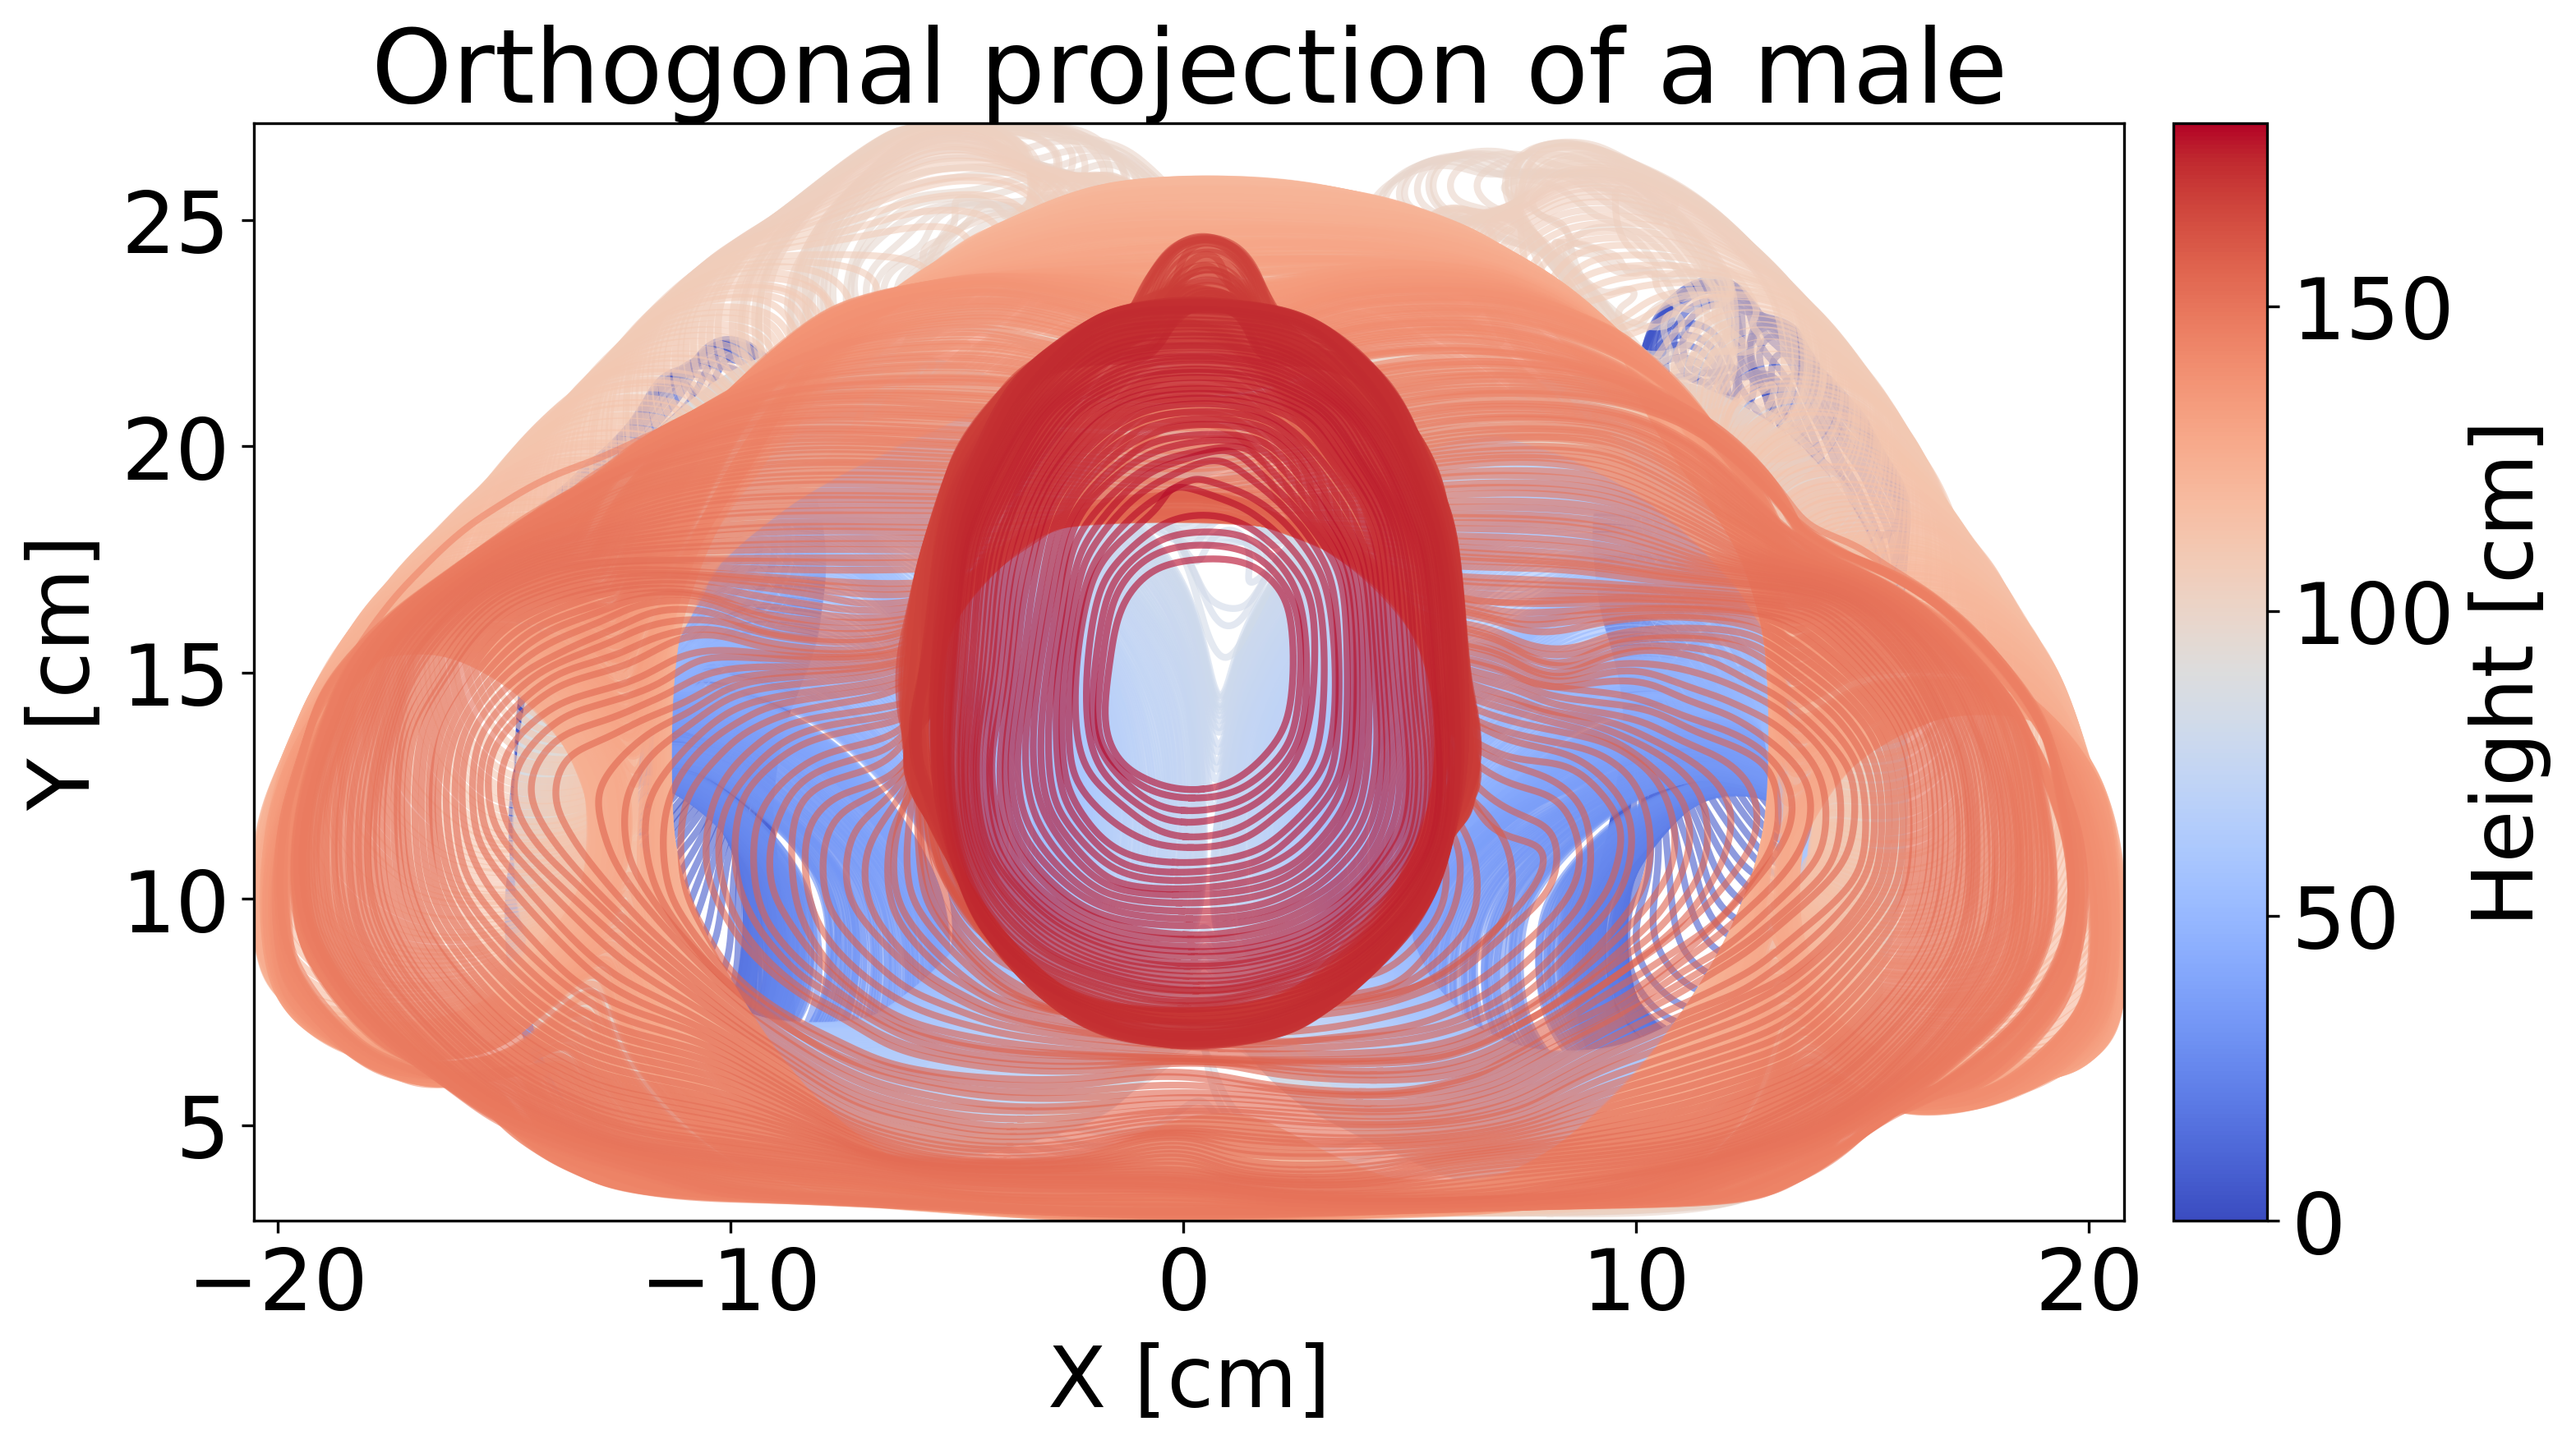

In [2]:
from streamlit_app.plot import plot
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

fig: Figure = plot.display_body3D_orthogonal_projection(current_agent)
plt.show()

#### Plot the superposition of MultiPolygon (one MultiPolygon per height)

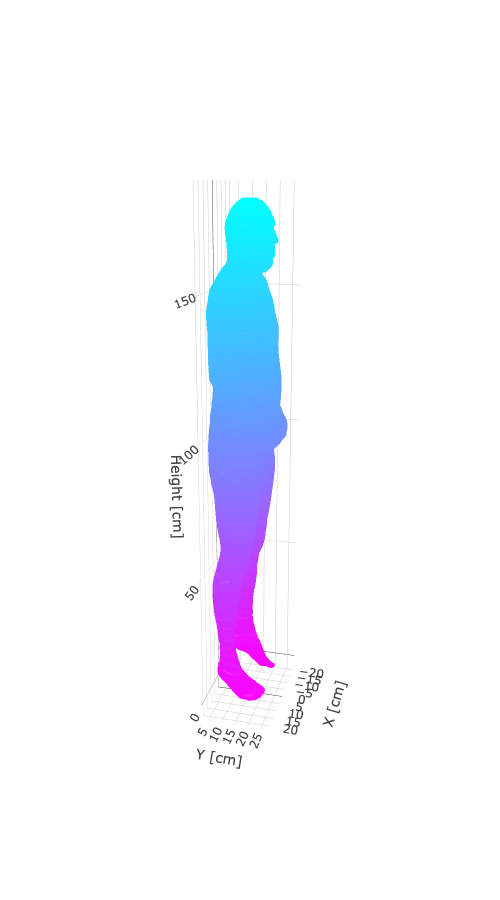

In [3]:
import plotly.graph_objects as go
from IPython.display import Image
from pathlib import Path

# Create a 3D plot of the agent using Plotly
fig_plotly: go.Figure = plot.display_body3D_polygons(current_agent)

# Display the generated Plotly figure in the documentation
path_data = Path.cwd().parent.parent / "data"
fig_plotly.write_image(path_data / "images" / "generated" / "pedestrian3D_multipolygon.png", format="png")
Image(path_data / "images" / "generated" / "pedestrian3D_multipolygon.png")

#### Plot the mesh

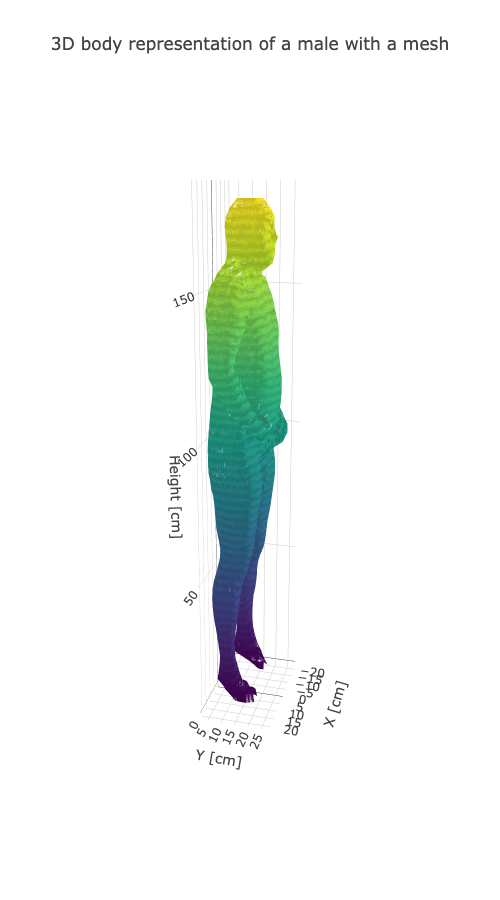

In [4]:
fig_plotly_mesh: go.Figure = plot.display_body3D_mesh(current_agent, precision=60)

# Display the generated Plotly figure in the documentation
fig_plotly_mesh.write_image(path_data / "images" / "generated" / "pedestrian3D_mesh.png", format="png")
Image(path_data / "images" / "generated" / "pedestrian3D_mesh.png")

## Display the content of the dictionnary defining the 3D pedestrians

In [5]:
# Retrieve additional parameters for 2D shapes associated with the current agent
shapes: dict[float, MultiPolygon] = current_agent.shapes3D.shapes

# Print only the first 10 elements (height and geometry) from the shapes dictionary
for i, (height, geometry) in enumerate(shapes.items()):
    if i >= 10:  # Stop after printing 10 elements
        break
    print(f"Height: {height:.3f} cm, Geometry: {geometry}")

Height: 0.000 cm, Geometry: MULTIPOLYGON (((-13.919135042479342 17.48727709467822, -13.949485100510913 17.496204710427982, -13.97893710601811 17.50745834117634, -14.007373518956522 17.5210591398127, -14.034678549649314 17.53701827191477, -14.060748161790126 17.5553335439389, -14.085487555649639 17.575990462062343, -14.1088159644632 17.598958813213795, -14.130663628718963 17.62419566569736, -14.15097095005059 17.651637724833, -14.169687402350503 17.681207240939955, -14.18677114338118 17.712808312818822, -14.202185728354964 17.746330057183243, -14.215900632806557 17.781637769123925, -14.227888855514099 17.81858343838628, -14.238124589796719 17.85699952603345, -14.246582324832268 17.89670441233261, -14.25323580467615 17.93749916902963, -14.258057115670857 17.979173869479396, -14.261016656224413 18.021506425434232, -14.262083092487378 18.06426779460866, -14.261223817173365 18.107222848109565, -14.258405575836848 18.150135724727257, -14.253596164324556 18.192771008473585, -14.24676563111059